In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.sql import text
import matplotlib.pyplot as plt

engine = create_engine('postgresql://postgres: @localhost:5432/Employee_SQL_Homework_db')
conn = engine.connect()

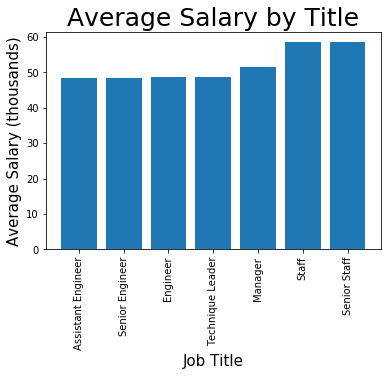

In [2]:
sql_statement  = "select t.title, round(avg(s.salary)/1000, 2) "
sql_statement += "from salaries s "
sql_statement += "join titles t on t.emp_no = s.emp_no "
sql_statement += "group by t.title "
sql_statement += "order by 2"

s = text(sql_statement)
rows = conn.execute(s).fetchall()

df = pd.DataFrame(rows, columns = ['title', 'salary'])

plt.bar(df['title'], df['salary'])
plt.xticks(rotation='vertical')
plt.title("Average Salary by Title", fontsize=25)
plt.xlabel("Job Title", fontsize=15)
plt.ylabel("Average Salary (thousands)", fontsize=15)

plt.show()

In [ ]:
#from sql_grading_rubric.pdf Bonus item #1
#✓ Correctly queries tables into pandas dataframes

sql_statement  = "select * from employees"
s = text(sql_statement)
rows = conn.execute(s).fetchall()
employees_df = pd.DataFrame(rows, columns = ['emp_no', 'birth_date', 'first_name', 'last_name', 'gender', 'hire_date'])

sql_statement  = "select * from departments"
s = text(sql_statement)
rows = conn.execute(s).fetchall()
departments_df = pd.DataFrame(rows, columns = ['dept_no','dept_name'])

sql_statement  = "select * from salaries"
s = text(sql_statement)
rows = conn.execute(s).fetchall()
salaries_df = pd.DataFrame(rows, columns = ['emp_no', 'salary', 'from_date', 'to_date'])

sql_statement  = "select * from titles"
s = text(sql_statement)
rows = conn.execute(s).fetchall()
titles_df = pd.DataFrame(rows, columns = ['emp_no', 'title', 'from_date', 'to_date'])

sql_statement  = "select * from dept_emp"
s = text(sql_statement)
rows = conn.execute(s).fetchall()
dept_emp_df = pd.DataFrame(rows, columns = ['emp_no', 'dept_no', 'from_date', 'to_date'])

sql_statement  = "select * from dept_manager"
s = text(sql_statement)
rows = conn.execute(s).fetchall()
dept_manager_df = pd.DataFrame(rows, columns = ['dept_no', 'emp_no', 'from_date', 'to_date'])